# xiaolei.chain document

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from corrLib import readseq
import numpy as np

## Characterization

### average cosine of bond angles
<code>avg_cos(traj, order_pNo)</code><br><br>
Calculate average cos's of adjacent particles (of a chain of particles) for a trajectory.
* traj: trajectory, a pd.DataFrame that contains columns (x, y, particle, frame)
* order_pNo: particle numbers in order, should be a list-like array

Returns:
* A pd.DataFrame containing columns (frame, cos)

In [3]:
from xiaolei.chain.characterize import avg_cos

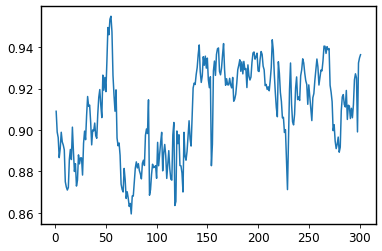

In [4]:
traj = pd.read_csv(r'I:\Github\Python\mylib\xiaolei\chain\test_files\data.csv')
order_pNo = [0, 13, 12, 11, 9, 8, 6, 7, 1, 2, 4, 3, 5, 14, 10]
df = avg_cos(traj, order_pNo)
plt.plot(df.frame, df.cos)

### Extract bond angle and arc length from particle tracking result
<code>get_angle_and_arc(traj, order_pNo)</code><br><br>
* traj: trajectory, a pd.DataFrame that contains columns (x, y, particle, frame)
* order_pNo: particle numbers in order, should be a list-like array

Returns:
* A pd.DataFrame containing columns (s, theta, frame), where s is arc length, theta is bond angle and frame is frame number

In [5]:
from xiaolei.chain.characterize import get_angle_and_arc
traj = pd.read_csv(r'E:\Github\Python\mylib\xiaolei\chain\test_files\lp\tracking1.csv')
order_pNo = np.array([0,1,2,3,4,5,6])
aaa = get_angle_and_arc(traj, order_pNo)
aaa.head()

s     theta  frame
0   33.459280 -0.279700      2
1   67.393147 -0.518862      2
2  102.155065 -0.517483      2
3  134.460589 -0.495552      2
4  167.024936 -0.471336      2

### Calculate the Fourier coefficient of a set of arc lengths and bond angles
<code>fourier_coef(data, n=10)</code><br><br>
* data: a pd.DataFrame containing columns (s, theta, frame), where s is arc length, theta is bond angle and frame is frame number (return value of function get_angle_and_arc)
* n: number of terms desired for the Fourier expansion


In [3]:
from xiaolei.chain.characterize import fourier_coef
data1 = pd.read_csv(r'E:\Github\Python\mylib\xiaolei\chain\test_files\lp\arc_and_angle.csv', index_col=0)
data = data1.loc[data1.frame==1]
coef = fourier_coef(data, n=12)
coef

array([-8.20667658e+00, -1.02485233e+00,  1.84662603e+00, -3.59087224e-01,
        1.37853566e+00, -3.15412023e-01,  5.08450380e-01, -7.56420584e-03,
       -3.19151784e-01,  2.53102885e-01, -1.56340552e+00, -1.06994720e-01])

## Particle tracking

### Particle tracking based on distance transform
<code>dt_track(folder, target_number, min_dist=20, radius=15, fitting_range=40, feature_size=7000, feature_number=1)</code><br><br>
Track chain partciles using masking and distance transform.
* folder: a folder directory containing an image sequence with extension _.tif_
* target_number: number of particles you aim to find
* min_dist：minimum distance allowed, one particle must not be too close to other particles, in order to be identified as a valid tracking.
* radius: radius of particle (px)
* fitting_range: fitting range for subpixel resolution fitting
* feature_size: whole chain size (px<sup>2</sup>)
* feature_number: number of chains you want to find (this might not be useful)
Returns:
* A pandas.DataFrame containing columns (x, y, Name), Name is the name of corresponding images

In [1]:
from xiaolei.chain.tracking import dt_track

In [3]:
folder = r'E:\Github\Python\mylib\xiaolei\chain\test_files'
traj = dt_track(folder, 15)
traj.head()

Processing frame 00000 ...
Processing frame 0008 ...
Processing frame 0019 ...
Processing frame 0035 ...
Processing frame 0086 ...
Processing frame 0299 ...


x           y   Name
0   194.693477   69.999956  00000
7   411.542376  118.151009  00000
10  460.503098  209.401868  00000
9   441.714350  180.034502  00000
12  505.832036  241.105994  00000

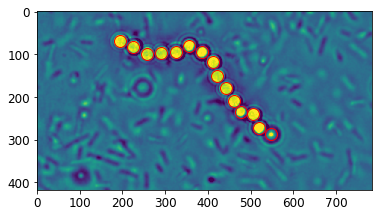

In [8]:
# Visualize the tracking result
l = readseq(folder)
for num, i in l.iterrows():
    if num > 0:
        break
    traj = traj.loc[traj.Name==i.Name]
    img = io.imread(i.Dir)
    plt.imshow(img)
    plt.plot(traj.x, traj.y, marker='o', markersize=12, ls='', mec='red', mfc=(0,0,0,0))